In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [3]:
def modify_data(df):
    df.columns = [x.lower() for x in df.columns]
    df.rename(columns={
            "passengerid":"passenger_id",
            "pclass":"passenger_class",
            "sibsp":"sibling_spouse",
            "parch":"parent_children"
        }, inplace=True)
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
    df.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
    return df


In [4]:
train_df.columns = [x.lower() for x in train_df.columns]
train_df.rename(columns={
            "passengerid":"passenger_id",
            "pclass":"passenger_class",
            "sibsp":"sibling_spouse",
            "parch":"parent_children"
        }, inplace=True)

In [5]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     891 non-null    int64  
 1   survived         891 non-null    int64  
 2   passenger_class  891 non-null    int64  
 3   name             891 non-null    object 
 4   sex              891 non-null    object 
 5   age              714 non-null    float64
 6   sibling_spouse   891 non-null    int64  
 7   parent_children  891 non-null    int64  
 8   ticket           891 non-null    object 
 9   fare             891 non-null    float64
 10  cabin            204 non-null    object 
 11  embarked         889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.drop(["embarked"],axis=1, inplace=True)

## Finding Missing Values

In [9]:
train_df.isnull().sum()

passenger_id         0
survived             0
passenger_class      0
name                 0
sex                  0
age                177
sibling_spouse       0
parent_children      0
ticket               0
fare                 0
cabin              687
dtype: int64

<AxesSubplot:>

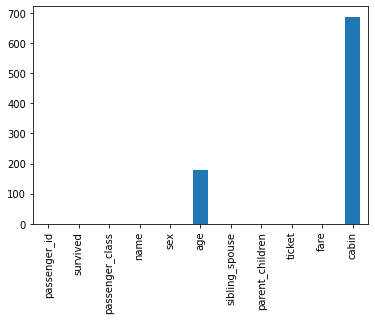

In [10]:
train_df.isnull().sum().plot(kind='bar')

## Fixing the Missing values

### AGE

In [11]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


These some ways of populating the age, like with mean, median and mode. We can try to group them by salutations and will update the data

In [12]:

train_df["salutation"] = train_df.name.apply(lambda x: x.split(",")[1].split(".")[0].strip())

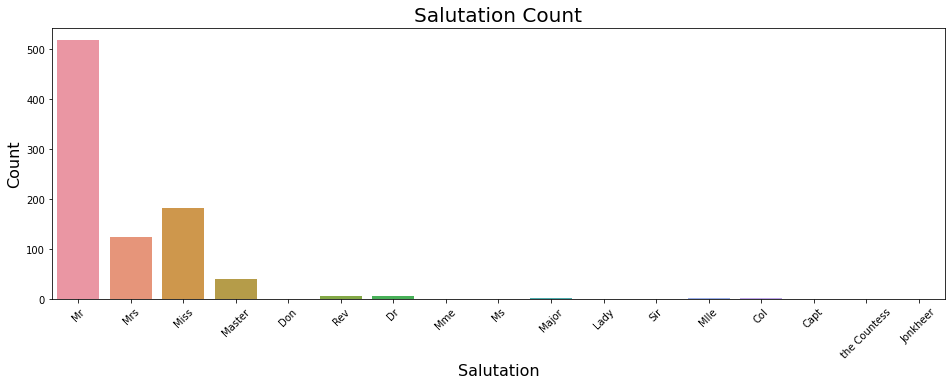

In [13]:
plt.figure(figsize=(16,5))
sns.countplot(x='salutation', data=train_df)
plt.xlabel("Salutation", fontsize=16) 
plt.ylabel("Count", fontsize=16)
plt.title("Salutation Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()


In [14]:
train_df.salutation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [15]:
salutation_dict = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master": "Master"
}

In [16]:
train_df['salutation'] = train_df.salutation.map(salutation_dict)

In [17]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr


In [18]:
age_group = train_df.groupby(["sex","passenger_class","salutation"])["age"]


In [19]:
age_group.median()

sex     passenger_class  salutation
female  1                Miss          30.0
                         Mrs           40.0
                         Officer       49.0
                         Royalty       40.5
        2                Miss          24.0
                         Mrs           31.5
        3                Miss          18.0
                         Mrs           31.0
male    1                Master         4.0
                         Mr            40.0
                         Officer       51.0
                         Royalty       40.0
        2                Master         1.0
                         Mr            31.0
                         Officer       46.5
        3                Master         4.0
                         Mr            26.0
Name: age, dtype: float64

In [20]:
age_group.transform('median')


0      26.0
1      40.0
2      18.0
3      40.0
4      26.0
       ... 
886    46.5
887    30.0
888    18.0
889    40.0
890    26.0
Name: age, Length: 891, dtype: float64

In [21]:
train_df.loc[train_df.age.isnull(), 'age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age, Length: 177, dtype: float64

In [22]:
train_df.loc[train_df.age.isnull(), 'age'] = age_group.transform('median')

In [23]:
train_df.age.isnull().sum()

0

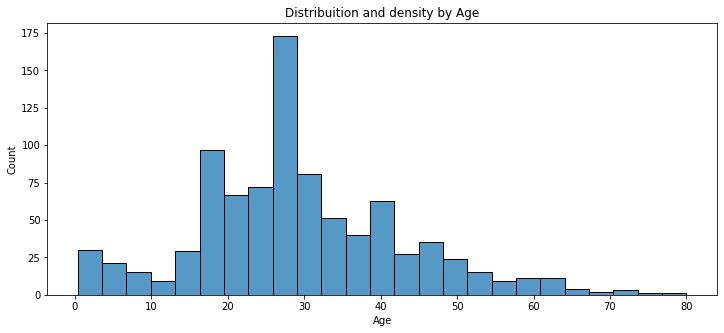

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(x='age', data=train_df)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


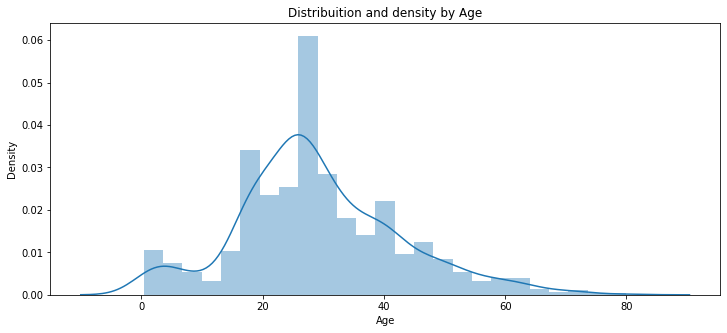

In [25]:
plt.figure(figsize=(12,5))
sns.distplot(x=train_df.age, bins=25)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x360 with 0 Axes>

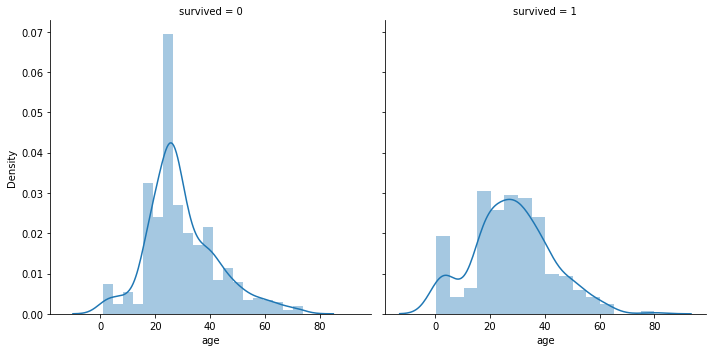

In [115]:
plt.figure(figsize=(12,5))
g = sns.FacetGrid(train_df, col='survived',size=5)
g = g.map(sns.distplot, "age")
plt.show()

### Age Feature Engineering

In [26]:
print(sorted(train_df.age.unique()))

[0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]


In [31]:
interval = (0, 15, 25, 40, 81) 
cats = ['children', 'youth', 'adult', 'senior']

# Applying the pd.cut and using the parameters that we created 
train_df["age_catg"] = pd.cut(train_df.age, interval, labels=cats)

# Printing the new Category
train_df["age_catg"].head()

0    youth
1    adult
2    adult
3    adult
4    adult
Name: age_catg, dtype: category
Categories (4, object): ['children' < 'youth' < 'adult' < 'senior']

In [32]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,salutation,age_catg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,adult


In [33]:
print(pd.crosstab(train_df.age_catg, train_df.survived))


survived    0    1
age_catg          
children   36   51
youth     157   96
adult     260  140
senior     96   55


/home/iamsyedjafer/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Distribution ')

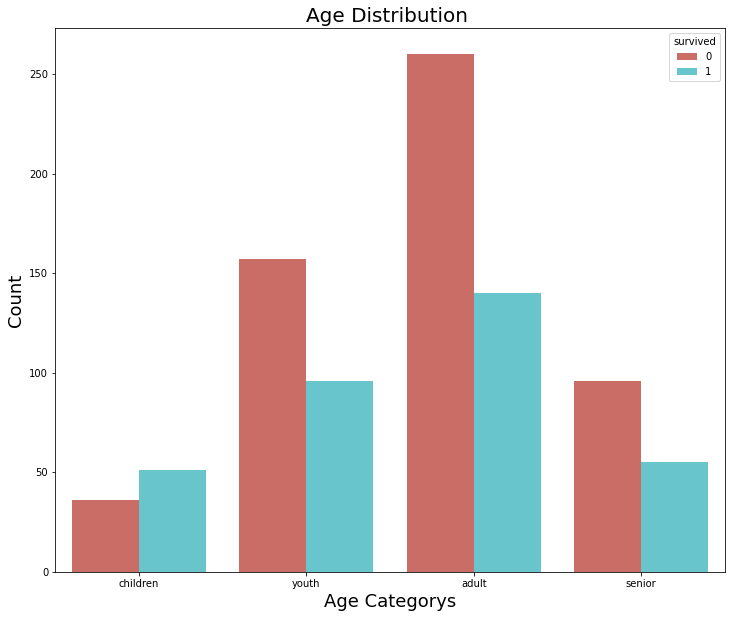

In [34]:
plt.figure(figsize=(12,10))
sns.countplot("age_catg", data=train_df, hue="survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

In [35]:
train_df.isnull().sum()

passenger_id         0
survived             0
passenger_class      0
name                 0
sex                  0
age                  0
sibling_spouse       0
parent_children      0
ticket               0
fare                 0
cabin              687
salutation           0
age_catg             0
dtype: int64

In [52]:
mask = train_df[(train_df.sibling_spouse==0) & (train_df.parent_children == 0)].index

In [53]:
train_df["alone"] = 1

In [54]:
train_df.loc[mask, "alone"] = 0

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,salutation,age_catg,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Mr,youth,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Mrs,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Mrs,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Mr,adult,0


In [ ]:
train_df["alone"] = train_D

In [56]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [57]:
train_df.sex = encoder.fit_transform(train_df.sex)
train_df.age_catg = encoder.fit_transform(train_df.age_catg)

In [58]:
train_df.head()

,passenger_id,survived,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,salutation,age_catg,alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Mr,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Mrs,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Mrs,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Mr,0,0


In [59]:
X = train_df[["passenger_class", "sex", "alone",'fare',"age_catg"]]
Y = train_df.survived

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [62]:

model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of training data :  0.7808988764044944
Accuracy score of testing data :  0.8212290502793296


In [63]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of training data :  0.651685393258427
Accuracy score of testing data :  0.7262569832402235


In [208]:
test_df

,passenger_id,passenger_class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked,salutation,age_catg,is_cabin
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,3,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,2,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,2,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,25.0,0,0,A.5. 3236,8.0500,NaN,2,2,3,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,5,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,2,0,0
416,1308,3,"Ware, Mr. Frederick",1,25.0,0,0,359309,8.0500,NaN,2,2,3,0


In [209]:
test_df.columns = [x.lower() for x in test_df.columns]
test_df.rename(columns={
            "passengerid":"passenger_id",
            "pclass":"passenger_class",
            "sibsp":"sibling_spouse",
            "parch":"parent_children"
        }, inplace=True)


test_df["salutation"] = test_df.name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
test_df['salutation'] = test_df.salutation.map(salutation_dict)
age_group = test_df.groupby(["sex","passenger_class","salutation"])["age"]
test_df.loc[test_df.age.isnull(), 'age'] = age_group.transform('median')
interval = (0, 15, 25, 65, 81) 
cats = ['children', 'youth', 'adult', 'senior']

# Applying the pd.cut and using the parameters that we created 
test_df["age_catg"] = pd.cut(test_df.age, interval, labels=cats)

# Printing the new Category
test_df["age_catg"].head()

test_df.embarked.fillna("S", inplace=True)
test_df["is_cabin"] = [0 if x==True else 1 for x in test_df.cabin.isnull()]
test_df.sex = encoder.fit_transform(test_df.sex)
test_df.embarked = encoder.fit_transform(test_df.embarked)
test_df.salutation = encoder.fit_transform(test_df.salutation)
test_df.age_catg = encoder.fit_transform(test_df.age_catg)
X_T = test_df[["passenger_class", "sex", "sibling_spouse", "parent_children", "embarked", "salutation", "age_catg", "is_cabin"]]
# Y_T = test_df.survived


In [210]:
X_T

,passenger_class,sex,sibling_spouse,parent_children,embarked,salutation,age_catg,is_cabin
0,3,1,0,0,1,2,0,0
1,3,0,1,0,2,3,0,0
2,2,1,0,0,1,2,0,0
3,3,1,0,0,2,2,0,0
4,3,0,1,1,2,3,3,0
...,...,...,...,...,...,...,...,...
413,3,1,0,0,2,2,3,0
414,1,0,0,0,0,5,0,1
415,3,1,0,0,2,2,0,0
416,3,1,0,0,2,2,3,0


In [211]:
result = model.predict(X_T)


In [212]:
sub_df = pd.read_csv("../data/gender_submission.csv")
sub_df["Survived"] = result
sub_df.to_csv("submission_2.csv", index=False)

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of training data :  0.7682584269662921
Accuracy score of testing data :  0.8100558659217877


In [225]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of training data :  0.7837078651685393
Accuracy score of testing data :  0.7877094972067039


In [194]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of training data :  0.8352059925093633
Accuracy score of testing data :  0.7871148459383753


/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/iamsyedjafer/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [195]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-3))

model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of testing data : ', testing_data_accuracy)

Accuracy score of training data :  0.795880149812734
Accuracy score of testing data :  0.7675070028011205
